In [1]:
import numpy as np
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

D:\anaconda\envs\tf-gpu-2.10.0-py-3.10\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda\envs\tf-gpu-2.10.0-py-3.10\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
D:\anaconda\envs\tf-gpu-2.10.0-py-3.10\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


https://juejin.cn/post/6973082167970627620

# 遗忘门
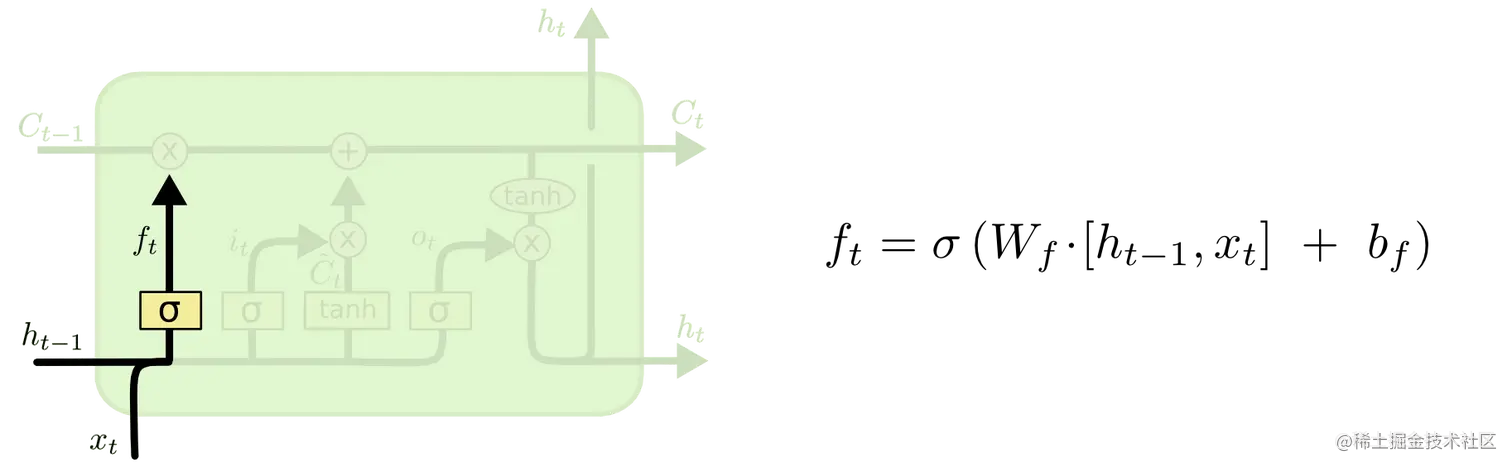
# 记忆门
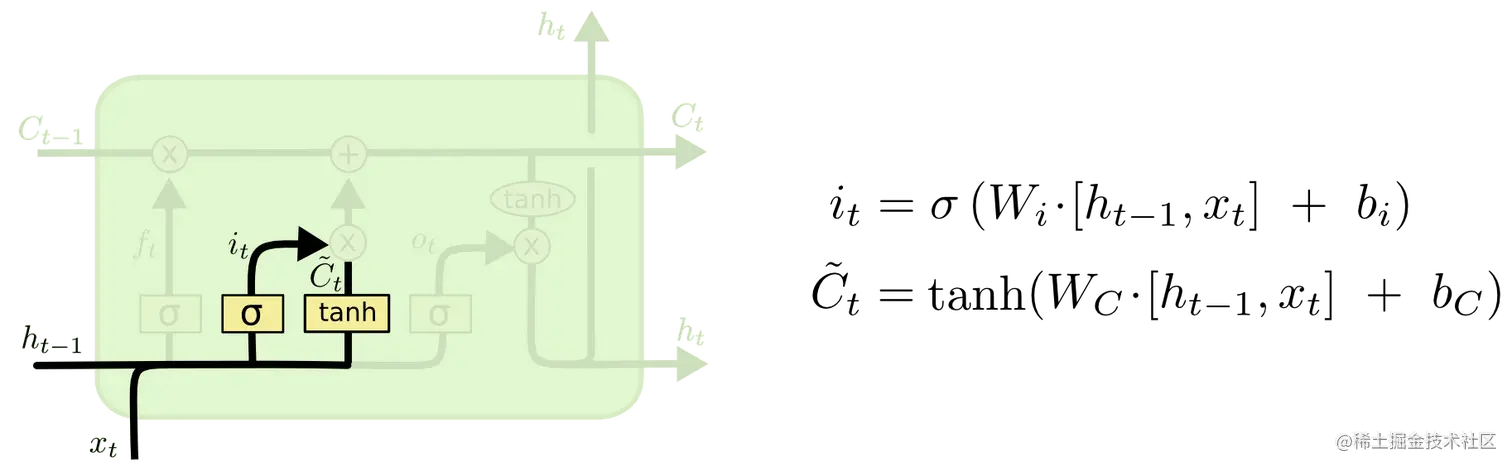
# 更新细胞状态
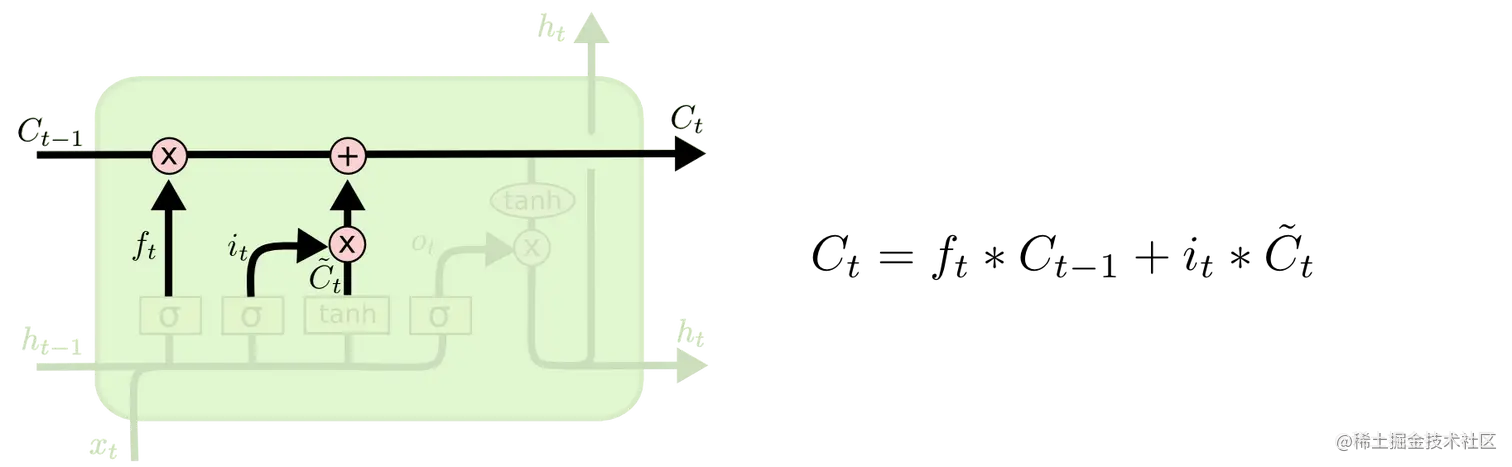
# 输出门
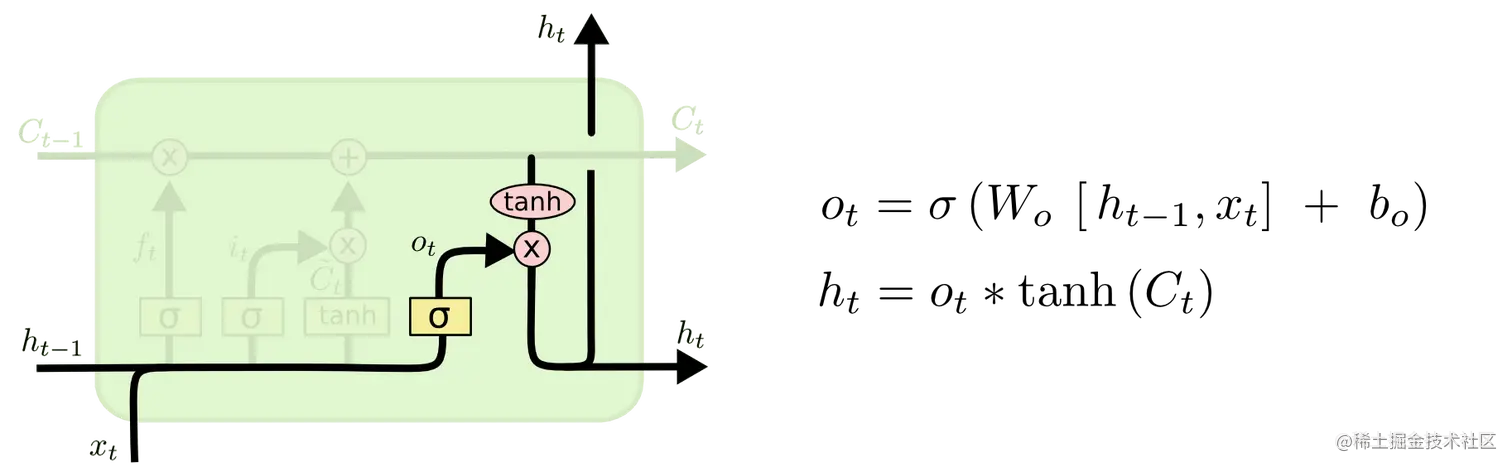

# 计算参数数量
4 * [shape(h) * [shape(h) +shape(x)] + shape(h)]

h = 64

x = 128

4 * (64 * (64 + 128) + 64) = 49408

In [5]:
max_vocab_size = 20000
max_len = 200
inputs = tf.keras.Input(shape=(None,), dtype="int32")
x = tf.keras.layers.Embedding(max_vocab_size, 128)(inputs)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(x)  # (None, None, 128)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(x)  # (None, 128)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_2 (Embedding)     (None, None, 128)         2560000   
                                                                 
 bidirectional_4 (Bidirectio  (None, None, 128)        98816     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,757,761
Trainable params: 2,757,761
Non-train

In [8]:
(x_train, y_train),(x_val, y_val) =  tf.keras.datasets.imdb.load_data(num_words=max_vocab_size)
x_train = tf.keras.utils.pad_sequences(x_train, maxlen=max_len)
x_val = tf.keras.utils.pad_sequences(x_val, maxlen=max_len)

In [14]:
x_train[:1], y_train[:1]

(array([[    5,    25,   100,    43,   838,   112,    50,   670,     2,
             9,    35,   480,   284,     5,   150,     4,   172,   112,
           167,     2,   336,   385,    39,     4,   172,  4536,  1111,
            17,   546,    38,    13,   447,     4,   192,    50,    16,
             6,   147,  2025,    19,    14,    22,     4,  1920,  4613,
           469,     4,    22,    71,    87,    12,    16,    43,   530,
            38,    76,    15,    13,  1247,     4,    22,    17,   515,
            17,    12,    16,   626,    18, 19193,     5,    62,   386,
            12,     8,   316,     8,   106,     5,     4,  2223,  5244,
            16,   480,    66,  3785,    33,     4,   130,    12,    16,
            38,   619,     5,    25,   124,    51,    36,   135,    48,
            25,  1415,    33,     6,    22,    12,   215,    28,    77,
            52,     5,    14,   407,    16,    82, 10311,     8,     4,
           107,   117,  5952,    15,   256,     4,     2,     7,

In [9]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=3, validation_data=(x_val, y_val))

Epoch 1/3
782/782 [==============================] - 30s 32ms/step - loss: 0.3821 - accuracy: 0.8299 - val_loss: 0.3295 - val_accuracy: 0.8622
Epoch 2/3
782/782 [==============================] - 24s 31ms/step - loss: 0.1907 - accuracy: 0.9286 - val_loss: 0.3687 - val_accuracy: 0.8501
Epoch 3/3
782/782 [==============================] - 24s 31ms/step - loss: 0.1145 - accuracy: 0.9576 - val_loss: 0.4512 - val_accuracy: 0.8584


In [ ]:
# 10.7G - 9.3G